In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [6]:
import pandas as pd
tweets=pd.read_csv("Elon_musk.csv",encoding='unicode_escape')

In [7]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# EDA

In [8]:
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [9]:
tweets.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [10]:
tweets.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [12]:
tweets.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [13]:
tweets.corr()

,Unnamed: 0
Unnamed: 0,1.0


In [14]:
tweets.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [15]:
# visualization

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>]], dtype=object)

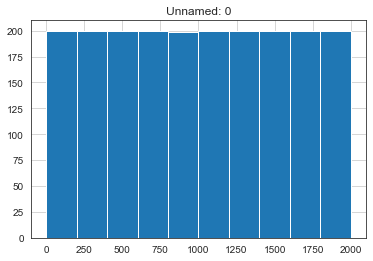

In [16]:
tweets.hist()

In [17]:
# get the length of dataset
len(tweets.index)

1999

In [18]:
tweets["Tweets"] = tweets["Text"] 

In [19]:
from collections import Counter

# import nltk
# import string
# nltk.download('stopwords')

In [20]:
!pip install nltk

In [21]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (tweets.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

In [22]:
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


In [23]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')
# sid = SentimentIntensityAnalyzer()

# SENTIMENT ANALYSIS

In [24]:
# nltk.download('wordnet')

Text(0, 0.5, 'Count')

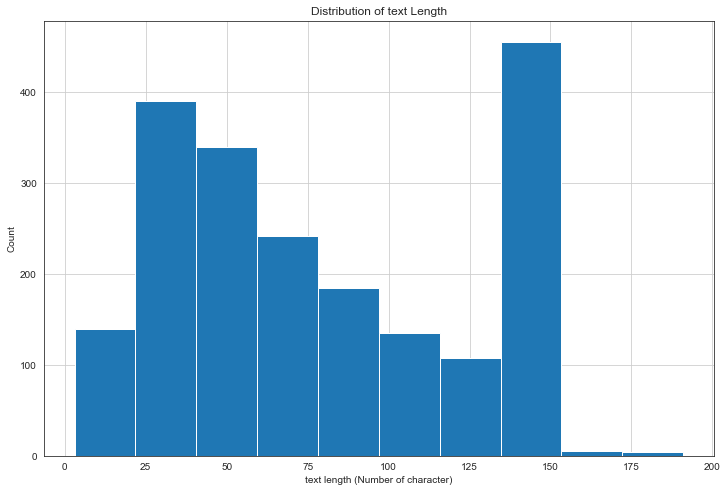

In [25]:
import matplotlib.pyplot as plt
text_length = tweets["Tweets"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

In [26]:
# Cleaning the text input for betting understanding of Machine..##

#Converting all review into Lowercase..

In [27]:
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [28]:
# removing punctuation from review..

In [29]:
import string
tweets["Tweets"]=tweets["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [30]:
# Remove Numbers from tweets...

In [62]:
tweets["Tweets"]=tweets["Tweets"].str.replace('[0-9]','')
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Check stop words are downleaded

In [34]:
from nltk.corpus import stopwords

In [35]:
# nltk.download('stopwords')
#stopwords = pd.read_csv('/content/stop(1).txt')

In [36]:
stop_words=stopwords.words('english')

In [37]:
import re #regular expression
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

clean = lambda x: clean_Tweets(x)

In [38]:
tweets.head()

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 Im an alien,kunalb im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...


In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shirisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
from textblob import Word
import textblob

In [41]:
from nltk.corpus import wordnet as wn

In [42]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
tweets["Tweets"]= tweets["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [43]:
Tweets_set=tweets["Tweets"]

In [44]:
import re
import sys

def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#text = remove_emoji(text_set)

In [45]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(tweets["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aber  able  abo  aboard  abort  about  above  absence  absolute  \
0        0     0    0       0      0      0      0        0         0   
1        0     0    0       0      0      0      0        0         0   
2        0     0    0       0      0      0      0        0         0   
3        0     0    0       0      0      0      0        0         0   
4        0     0    0       0      0      0      0        0         0   
...    ...   ...  ...     ...    ...    ...    ...      ...       ...   
1994     0     0    0       0      0      0      0        0         0   
1995     0     0    0       0      0      0      0        0         0   
1996     0     0    0       0      0      0      0        0         0   
1997     0     0    0       0      0      0      0        0         0   
1998     0     0    0       0      0      0      0        0         0   

      absolutely  ...  zikryzamir  zip  zogfotpik  zon  zone  zshauladventure  \
0              0  ...           0    0    

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(tweets["Tweets"])
print(TFIDF)

  (0, 119)	0.6285433221114817
  (0, 159)	0.40744258841301506
  (0, 2825)	0.6625132673210133
  (1, 2694)	0.1604723756939564
  (1, 4843)	0.31540251877820297
  (1, 5273)	0.19332295709705133
  (1, 1753)	0.20428642463027127
  (1, 3330)	0.3555588205218423
  (1, 2686)	0.13380334079919026
  (1, 1760)	0.37477517876954064
  (1, 5212)	0.18572377841406582
  (1, 942)	0.3227082391187474
  (1, 3427)	0.17917636818516897
  (1, 4820)	0.37477517876954064
  (1, 3846)	0.37477517876954064
  (1, 2541)	0.24337285315716084
  (2, 2666)	0.5161856469929814
  (2, 1682)	0.30551902189594055
  (2, 4390)	0.5657784482896928
  (2, 2745)	0.5657784482896928
  (3, 4953)	0.596806822457671
  (3, 1115)	0.4921816913727542
  (3, 1701)	0.596806822457671
  (3, 2686)	0.21307373374822786
  (4, 3230)	0.20590572063438894
  :	:
  (1995, 732)	0.36886193706642917
  (1995, 814)	0.36886193706642917
  (1995, 4631)	0.36886193706642917
  (1995, 393)	0.30419741403217937
  (1995, 3683)	0.17634930483470057
  (1995, 3035)	0.23670501954159281
  (

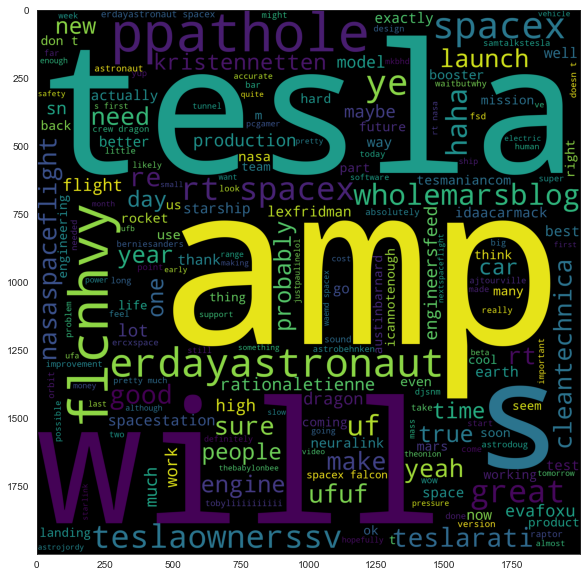

In [48]:
import wordcloud
from wordcloud import WordCloud

Review_wordcloud = ' '.join(tweets["Tweets"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)


In [49]:
freq = pd.Series(' '.join(tweets["Tweets"]).split()).value_counts()[0:20]
freq

the               486
to                400
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
rt                127
that              127
but               126
ppathole          123
dtype: int64

In [50]:
import collections
from collections import Counter
# import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shirisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
from textblob import TextBlob
tweets['polarity'] = tweets["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Tweets','polarity']].head()

,Tweets,polarity
0,kunalb im an alien,-0.250
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000
2,joerogan spotify great interview,0.800
3,gtera doge is underestimated,0.000
4,teslacn congratulations tesla china for amazin...,0.275


In [52]:
# Displaying top 5 positive posts of Category_A
tweets[tweets.polarity>0].head()

,Unnamed: 0,Text,Tweets,polarity
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,0.275000
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happy new year of the ox httpstcowfkmyuoj,0.468182
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owensparks flcnhvy anonyx haha thanks,0.200000
9,10,The most entertaining outcome is the most likely,the most entertaining outcome is the most likely,0.375000


In [53]:
tweets = tweets.drop(['Text'], axis = 1)
tweets

,Unnamed: 0,Tweets,polarity
0,1,kunalb im an alien,-0.250000
1,2,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge is underestimated,0.000000
4,5,teslacn congratulations tesla china for amazin...,0.275000
...,...,...,...
1994,1995,flcnhvy true it sounds so surreal but the nega...,0.111111
1995,1996,ppathole make sure to read ur terms amp condit...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb and dumber is ufuf,-0.375000


In [54]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [55]:
sent_type(tweets['polarity'])

negative
neutral
positive
neutral
positive
positive
neutral
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
negative
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
negative
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
negative
neutral
neutral
neutral
negative
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutr

In [56]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

Unnamed: 0       int64
Tweets          object
polarity       float64
category      category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

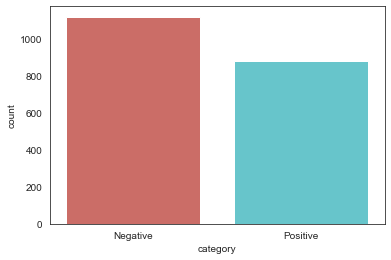

In [57]:
sns.countplot(x='category',data=tweets,palette='hls')


In [58]:
tweets.category.value_counts(normalize=True).mul(100)

Negative    55.927964
Positive    44.072036
Name: category, dtype: float64

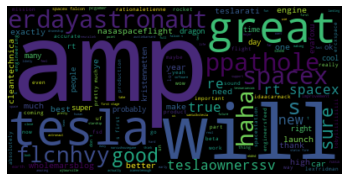

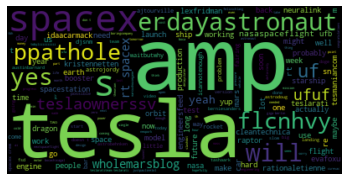

In [59]:
positive_reviews= tweets[tweets.category=='Positive']
negative_reviews= tweets[tweets.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Tweets.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Tweets.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()